In [1]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings

pd.options.display.max_rows = 200000
warnings.filterwarnings('ignore')

# For Visualisation

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Read

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

Clearly, label is the target variable.

# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
pixel30     int64
pixel31     int64
pixel32     int64
pixel33     int64
pixel34     int64
pixel35     int64
pixel36     int64
pixel37     int64
pixel38     int64
pixel39     int64
pixel40     int64
pixel41     int64
pixel42     int64
pixel43     int64
pixel44     int64
pixel45     int64
pixel46     int64
pixel47     int64
pixel48     int64
pixel49     int64
pixel50     int64
pixel51     int64
pixel52     int64
pixel53     int64
pixel54   

In [6]:
# Categorical and Numeric columns

cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
print('cat cols => ' + str(cat_cols))

print('###############################################')

numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
print('numeric cols => ' + str(numeric_cols))

cat cols => []
###############################################
numeric cols => ['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83

There are no categorical columns in our data set and it makes sense as it is all pixel data.

In [7]:
df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [8]:
df.describe()

label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8    ...         pixel774      pixel775  \
count  42000.0  42000.0  42000.0    ...     42000.000000  42000.000000   
mean       0.0      0.0      0.0    ...         0.219286      0.117095   
std        0.0      0.0      0.0    ...         6.312890      4.633819   
min        0.0      0.0      0.0    ...         0.000000      0.000000   
25%        0.0      0.0      0.0    ...         0.000000      0.000000   
50%        0.0      0.0      0.0    ...         0.000000      0.000000   
75%        0.0      0.0      0.0    ...         0.000000      0.000000   
max        0.0      0.0      0.0    ...       254.000000    254.000000   

           pixel776     pixel777      pixel778      pixel779  pixel780  \
count  42000.000000  42000.00000  42000.000000  42000.000000   42000.0   
mean       0.059024      0.02019      0.017238      0.002857       0.0   
std        3.274488      1.75987      1.894498      0.414264       0.0   
min        0.000000      0.00000      0.000000      0.000000       0.0   
25%        0.000000      0.00000      0.000000      0.000000       0.0   
50%        0.000000      0.00000      0.000000      0.000000       0.0   
75%        0.000000      0.00000      0.000000      0.000000       0.0   
max      253.000000    253.00000    254.000000     62.000000       0.0   

       pixel781  pixel782  pixel783  
count   42000.0   42000.0   42000.0  
mean        0.0       0.0       0.0  
std         0.0       0.0       0.0  
min         0.0       0.0       0.0  
25%         0.0       0.0       0.0  
50%         0.0       0.0       0.0  
75%         0.0       0.0       0.0  
max         0.0       0.0       0.0  

[8 rows x 785 columns]

## Unique Value Counts

In [9]:
unique_values = pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

unique_values['dtype'] = pd.DataFrame(df.dtypes)

unique_values

Unique Value Count  dtype
pixel783                   1  int64
pixel672                   1  int64
pixel673                   1  int64
pixel699                   1  int64
pixel700                   1  int64
pixel701                   1  int64
pixel727                   1  int64
pixel57                    1  int64
pixel55                    1  int64
pixel54                    1  int64
pixel53                    1  int64
pixel52                    1  int64
pixel728                   1  int64
pixel729                   1  int64
pixel730                   1  int64
pixel731                   1  int64
pixel754                   1  int64
pixel755                   1  int64
pixel671                   1  int64
pixel756                   1  int64
pixel645                   1  int64
pixel560                   1  int64
pixel112                   1  int64
pixel111                   1  int64
pixel140                   1  int64
pixel141                   1  int64
pixel168                   1  int64
pixel196                   1  int64
pixel782                   1  int64
pixel392                   1  int64
pixel420                   1  int64
pixel421                   1  int64
pixel448                   1  int64
pixel476                   1  int64
pixel532                   1  int64
pixel85                    1  int64
pixel84                    1  int64
pixel83                    1  int64
pixel82                    1  int64
pixel644                   1  int64
pixel757                   1  int64
pixel56                    1  int64
pixel759                   1  int64
pixel22                    1  int64
pixel21                    1  int64
pixel20                    1  int64
pixel19                    1  int64
pixel18                    1  int64
pixel758                   1  int64
pixel17                    1  int64
pixel16                    1  int64
pixel11                    1  int64
pixel23                    1  int64
pixel10                    1  int64
pixel8                     1  int64
pixel7                     1  int64
pixel6                     1  int64
pixel5                     1  int64
pixel4                     1  int64
pixel3                     1  int64
pixel2                     1  int64
pixel1                     1  int64
pixel0                     1  int64
pixel9                     1  int64
pixel24                    1  int64
pixel139                   1  int64
pixel781                   1  int64
pixel760                   1  int64
pixel780                   1  int64
pixel26                    1  int64
pixel28                    1  int64
pixel25                    1  int64
pixel27                    1  int64
pixel30                    1  int64
pixel29                    1  int64
pixel31                    1  int64
pixel753                   2  int64
pixel588                   2  int64
pixel364                   2  int64
pixel336                   2  int64
pixel110                   2  int64
pixel224                   2  int64
pixel169                   2  int64
pixel32                    2  int64
pixel14                    2  int64
pixel167                   2  int64
pixel726                   2  int64
pixel587                   2  int64
pixel113                   2  int64
pixel615                   2  int64
pixel59                    2  int64
pixel616                   2  int64
pixel58                    2  int64
pixel15                    2  int64
pixel643                   2  int64
pixel13                    3  int64
pixel725                   3  int64
pixel698                   3  int64
pixel779                   3  int64
pixel393                   3  int64
pixel33                    3  int64
pixel761                   3  int64
pixel51                    3  int64
pixel449                   3  int64
pixel504                   3  int64
pixel12                    3  int64
pixel559                   3  int64
pixel617                   3  int64
pixel86                    3  int64
pixel702                   4  int64
pixel252      

Even though there are many columns with single value, we are not going to drop them since they provide vital information in the way a digit is represented.

In [10]:
# Unique values of all columns

for col in df:
    print('\n################################')
    print('Unique values of ' + str(col))
    print('################################')
    print(pd.Series(df[col].unique()).sort_values(ascending=False))


################################
Unique values of label
################################
7    9
6    8
3    7
9    6
5    5
2    4
4    3
8    2
0    1
1    0
dtype: int64

################################
Unique values of pixel0
################################
0    0
dtype: int64

################################
Unique values of pixel1
################################
0    0
dtype: int64

################################
Unique values of pixel2
################################
0    0
dtype: int64

################################
Unique values of pixel3
################################
0    0
dtype: int64

################################
Unique values of pixel4
################################
0    0
dtype: int64

################################
Unique values of pixel5
################################
0    0
dtype: int64

################################
Unique values of pixel6
################################
0    0
dtype: int64

################################
Unique values of

In [11]:
# Frequency Distribution of unique values of all columns

for col in df:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of label
############################################
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

############################################
Unique value distribution of pixel0
############################################
0    42000
Name: pixel0, dtype: int64

############################################
Unique value distribution of pixel1
############################################
0    42000
Name: pixel1, dtype: int64

############################################
Unique value distribution of pixel2
############################################
0    42000
Name: pixel2, dtype: int64

############################################
Unique value distribution of pixel3
############################################
0    42000
Name: pixel3, dtype: int64

############################################
Unique value distribution of pixel4
######

In [12]:
# Check if all the values of the variables are in the same scale

numeric_cols = [cname for cname in df.columns if 
                                df[cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df[numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df[numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

Max  Min
label       9    0
pixel0      0    0
pixel1      0    0
pixel2      0    0
pixel3      0    0
pixel4      0    0
pixel5      0    0
pixel6      0    0
pixel7      0    0
pixel8      0    0
pixel9      0    0
pixel10     0    0
pixel11     0    0
pixel12   116    0
pixel13   254    0
pixel14   216    0
pixel15     9    0
pixel16     0    0
pixel17     0    0
pixel18     0    0
pixel19     0    0
pixel20     0    0
pixel21     0    0
pixel22     0    0
pixel23     0    0
pixel24     0    0
pixel25     0    0
pixel26     0    0
pixel27     0    0
pixel28     0    0
pixel29     0    0
pixel30     0    0
pixel31     0    0
pixel32    16    0
pixel33    47    0
pixel34   157    0
pixel35   254    0
pixel36   255    0
pixel37   243    0
pixel38   255    0
pixel39   255    0
pixel40   255    0
pixel41   255    0
pixel42   255    0
pixel43   255    0
pixel44   255    0
pixel45   255    0
pixel46   255    0
pixel47   255    0
pixel48   244    0
pixel49   255    0
pixel50   184    0
pixel51   197    0
pixel52     0    0
pixel53     0    0
pixel54     0    0
pixel55     0    0
pixel56     0    0
pixel57     0    0
pixel58    64    0
pixel59    29    0
pixel60   134    0
pixel61   128    0
pixel62   234    0
pixel63   255    0
pixel64   255    0
pixel65   255    0
pixel66   255    0
pixel67   255    0
pixel68   255    0
pixel69   255    0
pixel70   255    0
pixel71   255    0
pixel72   255    0
pixel73   255    0
pixel74   255    0
pixel75   255    0
pixel76   255    0
pixel77   255    0
pixel78   255    0
pixel79   255    0
pixel80   255    0
pixel81   165    0
pixel82     0    0
pixel83     0    0
pixel84     0    0
pixel85     0    0
pixel86   141    0
pixel87    84    0
pixel88   139    0
pixel89   255    0
pixel90   255    0
pixel91   255    0
pixel92   255    0
pixel93   255    0
pixel94   255    0
pixel95   255    0
pixel96   255    0
pixel97   255    0
pixel98   255    0
pixel99   255    0
pixel100  255    0
pixel101  255    0
pixel102  255    0
pixel103  255    0
pixel104  255    0
pixel105  255    0
pixel106  255    0
pixel107  255    0
pixel108  255    0
pixel109  164    0
pixel110  121    0
pixel111    0    0
pixel112    0    0
pixel113   38    0
pixel114   51    0
pixel115  114    0
pixel116  226    0
pixel117  255    0
pixel118  255    0
pixel119  255    0
pixel120  255    0
pixel121  255    0
pixel122  255    0
pixel123  255    0
pixel124  255    0
pixel125  255    0
pixel126  255    0
pixel127  255    0
pixel128  255    0
pixel129  255    0
pixel130  255    0
pixel131  255    0
pixel132  255    0
pixel133  255    0
pixel134  255    0
pixel135  255    0
pixel136  255    0
pixel137  254    0
pixel138  230    0
pixel139    0    0
pixel140    0    0
pixel141    0    0
pixel142   95    0
pixel143  255    0
pixel144  255    0
pixel145  255    0
pixel146  255    0
pixel147  255    0
pixel148  255    0
pixel149  255    0
pixel150  255    0
pixel151  255    0
pixel152  255    0
pixel153  255    0
pixel154  255    0
pixel155  255    0
pixel156  255    0
pixel157  255    0
pixel158  255    0
pixel159  255    0
pixel160  255    0
pixel161  255    0
pixel162  255    0
pixel163  255    0
pixel164  255    0
pixel165  255    0
pixel166  253    0
pixel167   18    0
pixel168    0    0
pixel169    4    0
pixel170  177    0
pixel171  255    0
pixel172  255    0
pixel173  255    0
pixel174  255    0
pixel175  255    0
pixel176  255    0
pixel177  255    0
pixel178  255    0
pixel179  255    0
pixel180  255    0
pixel181  255    0
pixel182  255    0
pixel183  255    0
pixel184  255    0
pixel185  255    0
pixel186  255    0
pixel187  255    0
pixel188  255    0
pixel189  255    0
pixel190  255    0
pixel191  255    0
pixel192  255    0
pixel193  255    0
pixel194  254    0
pixel195  253    0
pixel196    0    0
pixel197  128    0
pixel198  254    0
pixel199  255    0
pixel200  255    0
pixel201  255    0
pixel202  255    0
pixel203  255    0
pixel204  255    0
pixel205  255    0
pixel206  255    0
pixel207  255    0
pixel208  255    0
p

For some variables the values are not scaled. We will deal with this in the subsequent sections.

In [13]:
# Unique values of label column

col = 'label'

unique_list = pd.Series(df[col].unique()).sort_values(ascending=True).values

print('Unique values of ' + col + ' are =>\n')

for v in unique_list:
    print(v)

Unique values of label are =>

0
1
2
3
4
5
6
7
8
9


As provided in the problem statement, this is multi-class classification problem with 10 different classes.

# Data Cleaning

In [14]:
# Count of duplicates

df.duplicated().value_counts()

False    42000
dtype: int64

There are no duplicate entries in the data set.

In [15]:
# % of nulls in each column

null_series = pd.Series(round(100*(df.isnull().sum(axis=0)/len(df.index)), 2).sort_values(ascending = False))
null_series.loc[null_series.values > 0]

Series([], dtype: float64)

There are no missing values in the data set.

# Outlier Treatment

We already know that SVM isn't effected by the presence of outliers.

# EDA

In [16]:
label_means = df.groupby('label').mean()

label_means

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
label                                                                           
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
label            ...                                                        
0         0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
1         0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
2         0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
3         0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
4         0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
5         0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
6         0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
7         0.0    ...     1.846626  0.939105  0.397182  0.086344  0.118155   
8         0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
9         0.0    ...     0.258596  0.187440  0.174546  0.111748  0.048711   

       pixel779  pixel780  pixel781  pixel782  pixel783  
label                                                    
0      0.000000       0.0       0.0       0.0       0.0  
1      0.000000       0.0       0.0       0.0       0.0  
2      0.000000       0.0       0.0       0.0       0.0  
3      0.000000       0.0       0.0       0.0       0.0  
4      0.000000       0.0       0.0       0.0       0.0  
5      0.000000       0.0       0.0       0.0       0.0  
6      0.000000       0.0       0.0       0.0       0.0  
7      0.027267       0.0       0.0       0.0       0.0  
8      0.000000       0.0       0.0       0.0       0.0  
9      0.000000       0.0       0.0       0.0       0.0  

[10 rows x 784 columns]

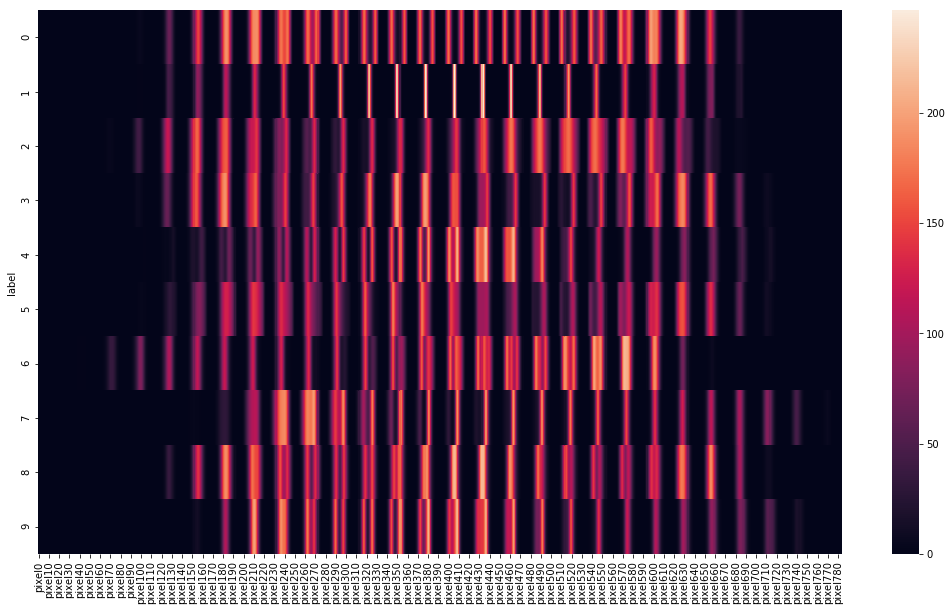

In [17]:
plt.figure(figsize=(18, 10))
sns.heatmap(label_means)

As you can see the heat map is not quite interpretable due to sheer number of variables.

# Data Preparation

In [18]:
# Using train test split to fetch only 20% of the data as per the problem statement

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)

df_80, df = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [19]:
len(df.values)

8400

In [20]:
# We use train test split again to actually split the 20% data into train and test sets for validation

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
numeric_cols = [cname for cname in df.columns if 
                                df[cname].dtype in ['int64', 'float64']]

numeric_cols.remove('label')

In [22]:
# Scaling the variables in both the training and test set

df_train[numeric_cols] = scale(df_train[numeric_cols])
df_test[numeric_cols] = scale(df_test[numeric_cols])

In [23]:
y_train = df_train.pop('label')
X_train = df_train

y_test = df_test.pop('label')
X_test = df_test

# Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [24]:
%%time

# Linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

# Accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# Classfication report
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9035714285714286 

[[221   0   0   1   0   2   1   0   0   0]
 [  0 263   0   0   0   1   0   1   4   1]
 [  2   1 216   7   4   2   1   3   2   1]
 [  0   3   3 224   0  16   1   3   5   3]
 [  0   0   4   0 227   1   1   0   2  10]
 [  3   3   1  13   2 225   3   0   3   1]
 [  5   2   3   0   3   4 245   0   0   0]
 [  1   2   3   2   5   1   0 233   0  11]
 [  3   3   7  11   2   7   3   4 214   2]
 [  3   2   1   0  20   3   0  14   1 209]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       225
           1       0.94      0.97      0.96       270
           2       0.91      0.90      0.91       239
           3       0.87      0.87      0.87       258
           4       0.86      0.93      0.89       245
           5       0.86      0.89      0.87       254
           6       0.96      0.94      0.95       262
           7       0.90      0.90      0.90       258
           8       0.93      0.84      0.88       2

The linear model gives approx. 90% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [25]:
%%time

# Non-linear model with polynomial kernel

# Using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='poly')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

# Accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# Classfication report
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.7841269841269841 

[[198   0   0   1   0   1   1   0  24   0]
 [  0 263   0   0   0   0   1   0   6   0]
 [  0   2 166   0   2   0   0   2  67   0]
 [  0   2   1 166   0   3   0   0  84   2]
 [  0   0   0   0 167   2   0   0  46  30]
 [  0   1   1   4   0 157   0   0  88   3]
 [  1   2   1   0   0   3 213   0  42   0]
 [  0   3   0   0   0   0   0 178  34  43]
 [  3   3   1   1   2   2   0   0 241   3]
 [  2   2   0   0   3   0   0   4  15 227]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       225
           1       0.95      0.97      0.96       270
           2       0.98      0.69      0.81       239
           3       0.97      0.64      0.77       258
           4       0.96      0.68      0.80       245
           5       0.93      0.62      0.74       254
           6       0.99      0.81      0.89       262
           7       0.97      0.69      0.81       258
           8       0.37      0.94      0.53       2

Poor performance of polynomial kernel due to poor choice of hyper parameters.

In [26]:
%%time

# Non-linear model with rbf kernel

# Using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

# Accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# Classfication report
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.930952380952381 

[[222   0   0   1   0   0   1   1   0   0]
 [  0 265   0   0   2   0   0   0   2   1]
 [  1   1 216   3   3   1   2   8   4   0]
 [  1   4   3 230   0   5   2   5   6   2]
 [  0   0   3   0 229   1   1   3   2   6]
 [  0   3   0   5   2 239   0   2   2   1]
 [  2   1   1   0   0   4 250   4   0   0]
 [  1   1   2   3   2   0   0 243   0   6]
 [  5   4   2   3   2   7   2   3 225   3]
 [  2   2   0   2   8   2   0   7   3 227]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       225
           1       0.94      0.98      0.96       270
           2       0.95      0.90      0.93       239
           3       0.93      0.89      0.91       258
           4       0.92      0.93      0.93       245
           5       0.92      0.94      0.93       254
           6       0.97      0.95      0.96       262
           7       0.88      0.94      0.91       258
           8       0.92      0.88      0.90       25

Relatively better performance than polynomial kernel.

# Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 3-fold cross validation.



In [27]:
%%time

# creating a KFold object with 3 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  7.5min finished


CPU times: user 7min 38s, sys: 1.28 s, total: 7min 40s
Wall time: 7min 41s


In [28]:
# cv results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       7.768680      0.124088         4.367179        0.031713       1   
1      11.454696      0.131909         5.712422        0.018243       1   
2       6.553108      0.056501         3.945864        0.038659      10   
3       5.618877      0.479294         4.213025        0.690527      10   
4       6.745564      0.111614         4.040894        0.127964     100   
5       3.996182      0.015682         3.154327        0.009803     100   
6       6.499716      0.112632         3.951889        0.016274    1000   
7       3.885449      0.012829         3.104251        0.011244    1000   

  param_gamma                        params  split0_test_score  \
0       0.001      {'C': 1, 'gamma': 0.001}           0.918367   
1      0.0001     {'C': 1, 'gamma': 0.0001}           0.890816   
2       0.001     {'C': 10, 'gamma': 0.001}           0.921939   
3      0.0001    {'C': 10, 'gamma': 0.0001}           0.917857   
4       0.001    {'C': 100, 'gamma': 0.001}           0.921939   
5      0.0001   {'C': 100, 'gamma': 0.0001}           0.910714   
6       0.001   {'C': 1000, 'gamma': 0.001}           0.921939   
7      0.0001  {'C': 1000, 'gamma': 0.0001}           0.913265   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.907653           0.913265         0.913095        0.004376   
1           0.872959           0.878061         0.880612        0.007510   
2           0.924490           0.922959         0.923129        0.001048   
3           0.906122           0.908673         0.910884        0.005039   
4           0.927041           0.923469         0.924150        0.002138   
5           0.906633           0.907143         0.908163        0.001816   
6           0.927041           0.923469         0.924150        0.002138   
7           0.902041           0.903061         0.906122        0.005068   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.966327            0.970408   
1                8            0.899235            0.906122   
2                3            0.999745            0.998980   
3                5            0.955357            0.958673   
4                1            1.000000            1.000000   
5                6            0.995663            0.997704   
6                1            1.000000            1.000000   
7                7            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.973724          0.970153         0.003026  
1            0.901276          0.902211         0.002889  
2            0.998724          0.999150         0.000434  
3            0.963776          0.959269         0.003462  
4            1.000000          1.000000         0.000000  
5            0.996173          0.996514         0.000867  
6            1.000000          1.000000         0.000000  
7            1.000000          1.000000         0.000000

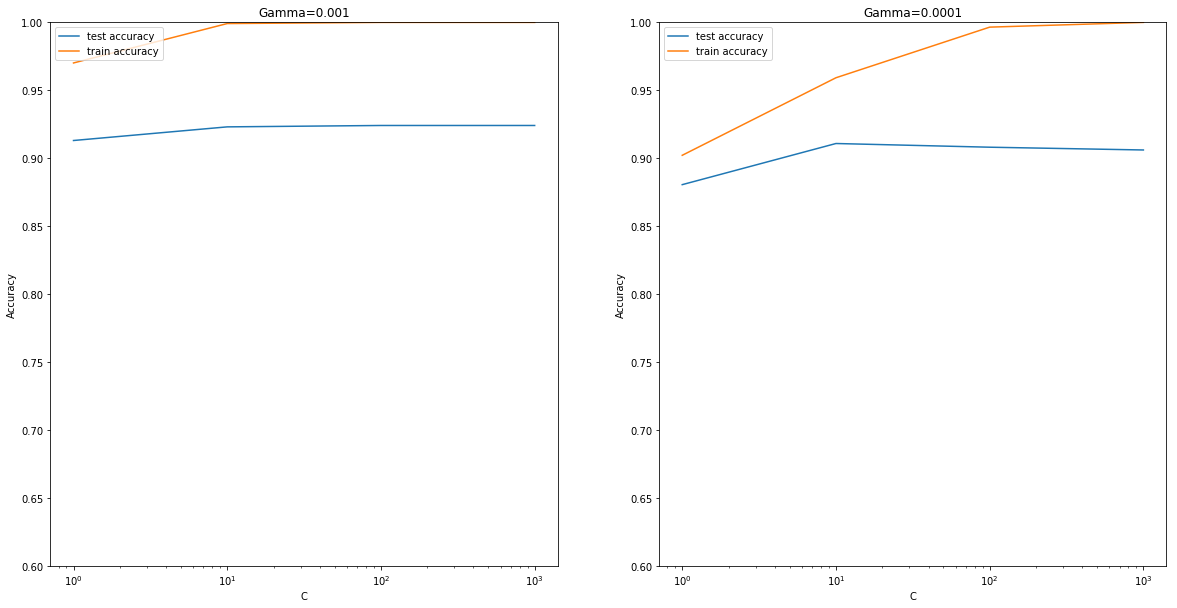

In [29]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,10))

# subplot 1/2
plt.subplot(121)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 2/2
plt.subplot(122)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()

In [30]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9241496598639456 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


# Building and Evaluating the Final Model

Let's now build and evaluate the final model with the above obtained hyper parameter values.

In [31]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# Classfication report
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy 0.9365079365079365 

[[222   0   0   1   0   0   1   1   0   0]
 [  0 265   0   0   1   0   0   1   2   1]
 [  2   1 219   5   2   0   1   5   4   0]
 [  1   2   1 236   0   4   1   7   4   2]
 [  0   0   2   0 229   0   1   2   3   8]
 [  0   2   1   4   2 239   2   0   3   1]
 [  2   1   1   0   0   5 251   2   0   0]
 [  1   2   2   2   2   0   0 244   0   5]
 [  4   2   5   8   2   3   2   4 224   2]
 [  3   0   0   2   9   1   0   6   1 231]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       225
           1       0.96      0.98      0.97       270
           2       0.95      0.92      0.93       239
           3       0.91      0.91      0.91       258
           4       0.93      0.93      0.93       245
           5       0.95      0.94      0.94       254
           6       0.97      0.96      0.96       262
           7       0.90      0.95      0.92       258
           8       0.93      0.88      0.90       25

We achieved an accuracy of 93.6% with the best values of C and gamma and also the other metrics look decent.

# Predicting labels on test.csv data set

In [32]:
df_test = pd.read_csv('test.csv')

df_test[numeric_cols] = scale(df_test[numeric_cols])

In [33]:
%%time

# model with optimal hyperparameters

# model
y_pred = model.predict(df_test)

results = pd.Series(y_pred,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), results],axis = 1)

submission.to_csv("kaggle_mnist.csv", index=False)

CPU times: user 1min 18s, sys: 450 ms, total: 1min 18s
Wall time: 1min 19s


The accurancy obtained after uploading this to Kaggle is 93.8%.